# Valorant Agent Stats of Platinum 3 Players (as of August 2023)
## About Me
Hello! I'm Franchella, a passionate data enthusiast with a love for both gaming and data analysis. As a retired Valorant player and data science enthusiast, I've combined my interests to delve into the exciting world of Valorant, Riot Games' popular tactical shooter game. With a background in data analysis and visualization, I've set out on a journey to uncover insights from the world of Valorant Agent Stats.
## Overview
In this project, I've dived  into the Valorant gaming community to analyze and visualize the Agent Stats of Platinum 3 players as of August 2023. By using Python and its data science libraries, I've transformed raw data into meaningful visualizations that provide a comprehensive understanding of the current gaming landscape.
## Data Collection
I've gathered extensive data on Platinum 3 players' Agent performance from [Blitz](https://blitz.gg/valorant/stats/agents) to ensure accuracy and relevance. This dataset comprises crucial gameplay statistics, including win rates, pick rates, kill-death ratios, and more for each Agent.
## Why I Chose Platinum 3 for the Rank
I focused on Platinum 3 players due to their well-balanced skill level that often reflects a combination of tactical prowess and mechanical finesse. Platinum 3 lies at the heart of the competitive ladder, offering a sweet spot where players have honed their fundamentals while still retaining room for growth. This rank showcases a deep understanding of Agent abilities and map dynamics, often leading to engaging and unpredictable gameplay. My decision to concentrate on Platinum 3 instead of other ranks stems from its representation of players who have managed to consistently perform in competitive matches, demonstrating their commitment to improvement and adaptability. This selection ensures that the insights drawn from the data provide a holistic view of Agent performance that can guide aspiring players and enthusiasts alike.

## Data Analysis and Visualization

#### Packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [49]:
data = pd.read_csv('/kaggle/input/val-stats/val_stats - Sheet1.csv')

#### Gathering data

I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [50]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt
4,Reyna,1.14,17.8/15.7/4.4,50.0,10.1,244,0.2
2,Phoenix,1.11,17.3/15.5/4.7,50.6,3.0,240,0.2
12,Jett,1.09,17.4/16/3.6,49.2,12.9,239,0.2
15,Chamber,1.09,16.4/15/2.8,48.8,4.7,219,0.2
6,Raze,1.06,16.9/16/4.8,49.8,7.5,242,0.2


Then, I looked into the KDA of each agent. First, I created three more columns, "kills by kda", "deaths by kda", and "assists by kda". Then I sorted the new columns by descending order.

In [51]:
data.dtypes

agent                object
kd                  float64
kda                  object
win_pcnt            float64
pick_pcnt           float64
avg_score             int64
first_blood_pcnt    float64
dtype: object

In [52]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
0,Brimstone,0.98,14.6/14.9/9,51.1,6.1,205,0.1,14.6,14.9,9
1,Sage,0.94,14/14.9/7.1,50.6,5.7,193,0.1,14,14.9,7.1
2,Phoenix,1.11,17.3/15.5/4.7,50.6,3.0,240,0.2,17.3,15.5,4.7
3,Killjoy,1.01,14.6/14.4/3.6,50.0,6.0,201,0.1,14.6,14.4,3.6
4,Reyna,1.14,17.8/15.7/4.4,50.0,10.1,244,0.2,17.8,15.7,4.4


In [53]:
data_killsbykda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killsbykda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
4,Reyna,1.14,17.8/15.7/4.4,50.0,10.1,244,0.2,17.8,15.7,4.4
12,Jett,1.09,17.4/16/3.6,49.2,12.9,239,0.2,17.4,16,3.6
2,Phoenix,1.11,17.3/15.5/4.7,50.6,3.0,240,0.2,17.3,15.5,4.7
6,Raze,1.06,16.9/16/4.8,49.8,7.5,242,0.2,16.9,16,4.8
15,Chamber,1.09,16.4/15/2.8,48.8,4.7,219,0.2,16.4,15,2.8


In [54]:
data_deathsbykda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathsbykda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
18,Neon,0.99,16.2/16.4/4.2,47.6,1.1,226,0.2,16.2,16.4,4.2
6,Raze,1.06,16.9/16/4.8,49.8,7.5,242,0.2,16.9,16,4.8
12,Jett,1.09,17.4/16/3.6,49.2,12.9,239,0.2,17.4,16,3.6
4,Reyna,1.14,17.8/15.7/4.4,50.0,10.1,244,0.2,17.8,15.7,4.4
19,Yoru,1.02,16.1/15.7/4.3,47.1,1.2,221,0.2,16.1,15.7,4.3


In [55]:
data_assistsbykda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistsbykda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
0,Brimstone,0.98,14.6/14.9/9,51.1,6.1,205,0.1,14.6,14.9,9
21,Kay/O,0.92,14.3/15.6/8.9,45.1,2.0,203,0.1,14.3,15.6,8.9
7,Skye,0.95,14.3/15.1/7.8,49.7,6.8,197,0.1,14.3,15.1,7.8
16,Omen,0.98,14.9/15.1/7.8,48.6,8.4,204,0.1,14.9,15.1,7.8
17,Breach,0.94,14.4/15.3/7.1,48.5,3.5,198,0.1,14.4,15.3,7.1


After that, I sorted the win percent of each agent in descending order.

In [56]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
0,Brimstone,0.98,14.6/14.9/9,51.1,6.1,205,0.1,14.6,14.9,9
1,Sage,0.94,14/14.9/7.1,50.6,5.7,193,0.1,14,14.9,7.1
2,Phoenix,1.11,17.3/15.5/4.7,50.6,3.0,240,0.2,17.3,15.5,4.7
3,Killjoy,1.01,14.6/14.4/3.6,50.0,6.0,201,0.1,14.6,14.4,3.6
4,Reyna,1.14,17.8/15.7/4.4,50.0,10.1,244,0.2,17.8,15.7,4.4


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

In [57]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
12,Jett,1.09,17.4/16/3.6,49.2,12.9,239,0.2,17.4,16,3.6
4,Reyna,1.14,17.8/15.7/4.4,50.0,10.1,244,0.2,17.8,15.7,4.4
16,Omen,0.98,14.9/15.1/7.8,48.6,8.4,204,0.1,14.9,15.1,7.8
6,Raze,1.06,16.9/16/4.8,49.8,7.5,242,0.2,16.9,16,4.8
7,Skye,0.95,14.3/15.1/7.8,49.7,6.8,197,0.1,14.3,15.1,7.8


Lastly, I sorted the average score of each agent in descending order.

In [58]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
4,Reyna,1.14,17.8/15.7/4.4,50.0,10.1,244,0.2,17.8,15.7,4.4
6,Raze,1.06,16.9/16/4.8,49.8,7.5,242,0.2,16.9,16,4.8
2,Phoenix,1.11,17.3/15.5/4.7,50.6,3.0,240,0.2,17.3,15.5,4.7
12,Jett,1.09,17.4/16/3.6,49.2,12.9,239,0.2,17.4,16,3.6
18,Neon,0.99,16.2/16.4/4.2,47.6,1.1,226,0.2,16.2,16.4,4.2


## Graphs of Results

### Kill-Death Scores of the Valorant Agents

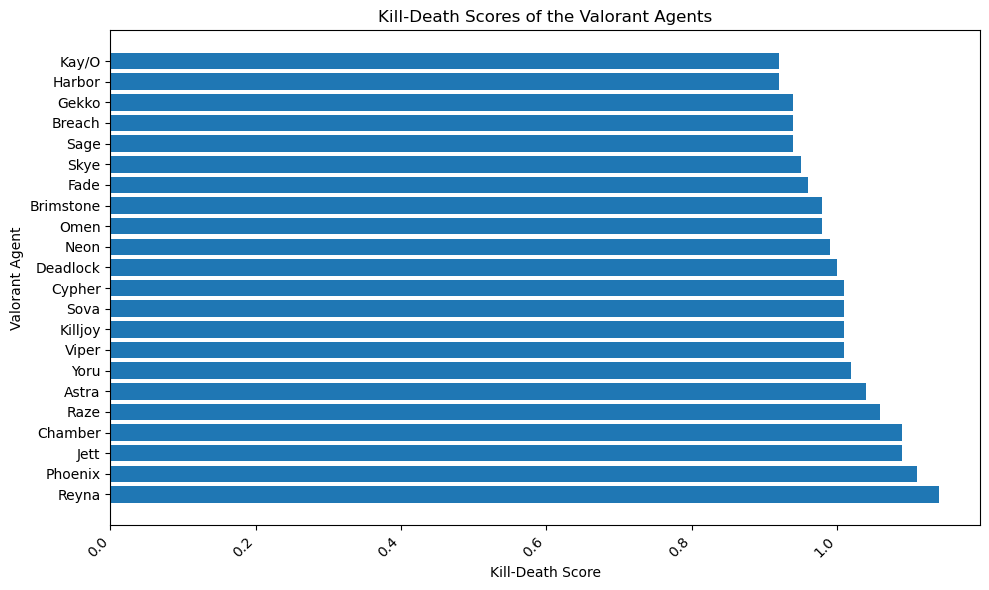

In [59]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
The analysis of Valorant Agent Stats based on the KD (Kill-Death) ratio column, sorted from highest to lowest, provides valuable insights into the performance of different agents among Platinum 3 players as of August 2023:

**Reyna (KD: 1.14)**: Reyna leads the pack with the highest KD ratio of 1.14. Her aggressive playstyle and self-sustain mechanics seem to contribute to her effectiveness in securing kills while minimizing deaths.

**Phoenix (KD: 1.11)**: Phoenix closely follows with a KD ratio of 1.11. As a self-sufficient Duelist, Phoenix's abilities to heal and control engagements might explain his consistent performance.

**Jett (KD: 1.09)**: Jett maintains a strong presence with a KD ratio of 1.09. Her mobility and aggressive toolkit enable skilled players to secure kills and outmaneuver opponents.

**Chamber (KD: 1.09)**: Chamber shares the same KD ratio as Jett, further highlighting the versatile and formidable nature of the Duelist class agents.

**Raze (KD: 1.06)**: Raze rounds out the top five with a KD ratio of 1.06. Her explosive abilities and aggressive playstyle contribute to her effectiveness in the battlefield.

This data indicates that aggressive Duelist agents like Reyna, Phoenix, Jett, and Raze are favored among Platinum 3 players for their ability to secure kills and potentially turn the tide of rounds in their team's favor. However, it's important to note that other factors such as agent pick rate, map dynamics, and player strategies also play a significant role in these statistics.

### Valorant Agent Kills by KDA

In [60]:
data_killskda_asc = data.sort_values(by='kills_kda', ascending=True)
data_killskda_asc.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
1,Sage,0.94,14/14.9/7.1,50.6,5.7,193,0.1,14,14.9,7.1
20,Harbor,0.92,14/15.2/6.3,46.0,0.8,193,0.1,14,15.2,6.3
9,Gekko,0.94,14.2/15.1/4.8,49.5,2.3,192,0.1,14.2,15.1,4.8
21,Kay/O,0.92,14.3/15.6/8.9,45.1,2.0,203,0.1,14.3,15.6,8.9
7,Skye,0.95,14.3/15.1/7.8,49.7,6.8,197,0.1,14.3,15.1,7.8


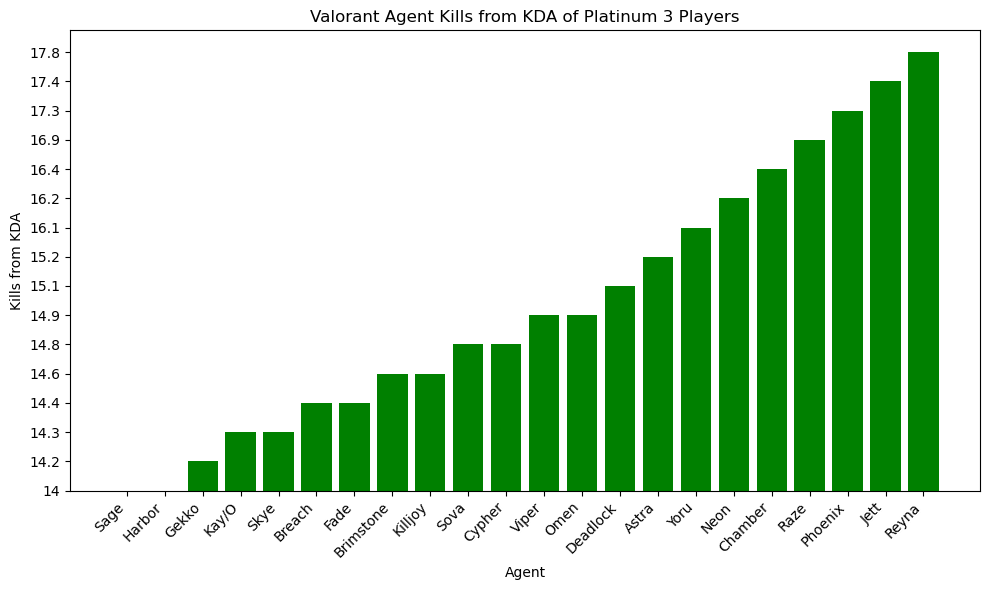

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_asc['agent'], data_killskda_asc['kills_kda'], color = 'green')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA of Platinum 3 Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
Analyzing the results in the "kills_by_kda" column, sorted from highest to lowest, provides insights into the agents that excel in securing kills relative to their overall performance:

**Reyna**: Reyna maintains her lead with the highest kills per KDA ratio. Her ability to secure kills while also self-sustaining through eliminations showcases her aggressive and self-reliant gameplay.

**Jett**: Jett continues to demonstrate her proficiency in securing kills relative to her KDA. Her mobility and precise aiming contribute to her consistent presence in engagements.

**Phoenix**: Phoenix follows closely, indicating his effectiveness in actively participating and eliminating opponents.

**Raze**: Raze's explosive arsenal enables her to consistently rack up kills, showcasing her role as a fragger within a team.

**Chamber**: Chamber's ability to secure kills is evident, highlighting the potential of this relatively new agent in engagements.

There are also a few common themes among the top 5 agents in terms of their performance metrics:

**Duelist Classification**: Reyna, Jett, Phoenix, and Raze all fall under the "Duelist" classification, which indicates their primary role as fraggers and entry fraggers. This classification aligns with their strong kill-focused performance.

**Mobility and Self-Sufficiency**: Mobility is a common trait among these agents, allowing players to reposition quickly, engage enemies from unexpected angles, and escape unfavorable situations. Agents like Jett and Raze, in particular, have abilities that enhance their mobility and self-sufficiency.

It's important to note that while these commonalities contribute to their high kill rates, they also highlight the importance of teamwork and strategy in maximizing the effectiveness of these agents. A balanced team composition and coordinated efforts can further enhance their impact on the game.

### Valorant Agent Deaths by KDA

In [62]:
data_deathskda_asc = data.sort_values(by='deaths_kda', ascending=True)
data_deathskda_asc.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
3,Killjoy,1.01,14.6/14.4/3.6,50.0,6.0,201,0.1,14.6,14.4,3.6
10,Cypher,1.01,14.8/14.6/4.7,49.2,3.8,199,0.1,14.8,14.6,4.7
8,Astra,1.04,15.2/14.6/6.8,49.5,2.4,207,0.1,15.2,14.6,6.8
5,Sova,1.01,14.8/14.7/5.8,49.8,3.9,206,0.1,14.8,14.7,5.8
11,Viper,1.01,14.9/14.8/5.8,49.2,2.0,207,0.1,14.9,14.8,5.8


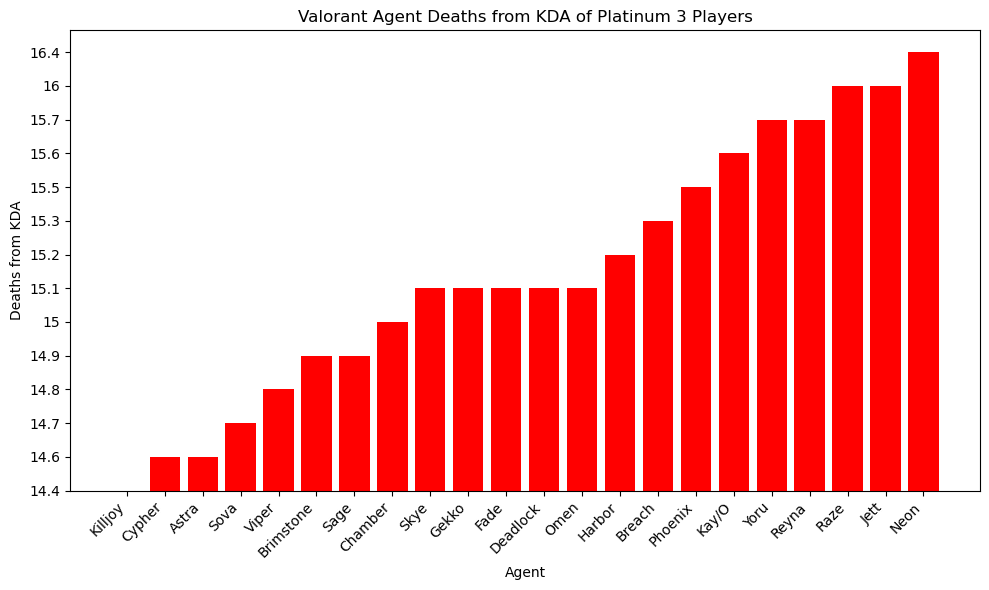

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_asc['agent'], data_deathskda_asc['deaths_kda'], color = 'red')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA of Platinum 3 Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing the results in the "deaths_by_kda" column, sorted from highest to lowest, provides insights into the agents that exhibit relatively higher death rates compared to their overall KDA:

**Low Deaths and High KDA:**
The top-performing agents in terms of the "deaths_kda" metric are those who manage to achieve impressive KDA ratios while keeping their deaths relatively low. This combination indicates a strong ability to secure kills and assists while minimizing the risk of being eliminated.

**Aggressive Playstyles:**
Agents like Reyna, Jett, and Raze feature prominently at the top of the list, suggesting that their aggressive and self-sustaining playstyles allow them to secure kills and assists while maintaining a relatively low death count. Their mobility and dueling capabilities contribute to their ability to control engagements effectively.

**Balanced Contributions:**
Agents with a balanced focus on kills, assists, and deaths, such as Brimstone, Sage, and Sova, demonstrate tactical awareness and a commitment to team dynamics. These agents likely emphasize strategic positioning and support roles to secure victories.

**Map Control and Crowd Manipulation:**
The presence of agents like Killjoy and Cypher low on the list suggests their proficiency in map control and crowd manipulation. Their utility-driven playstyles allow them to create advantageous situations for their team by controlling chokepoints and gathering crucial information.

**Ultimate Impact:**
Certain agents with impactful ultimates, such as Jett and Chamber, make calculated use of their abilities to secure kills and change the tide of the game. This ability to strategically leverage ultimates contributes to their low death rates and high KDA ratios.

**Map Influence and Team Composition:**
While individual agent performance is crucial, the choice of agent also depends on the map's characteristics and the team's composition. Some agents may excel on specific maps, while others complement particular playstyles and strategies.


Agents like Reyna, Jett, and Raze shine for their aggressive playstyles and capacity to secure kills while staying alive. For those seeking a more supportive role, agents like Brimstone, Sage, and Sova offer a balanced approach to KDA and deaths. Understanding the strengths and weaknesses of each agent and adapting them to the dynamic context of the match will contribute to success in the Platinum 3 rank, making the most of each engagement and strategic opportunity while ensuring a positive impact on the team's performance.

It's important to consider that a higher death rate doesn't necessarily indicate poor performance; some agents might be designed to engage in risky or high-impact actions for the team's benefit. These statistics underscore the importance of understanding each agent's role and how their abilities contribute to team dynamics.

There are some common themes among the top 4 agents in terms of deaths per KDA:

**Initiation and Frontlining**: The agents with the highest deaths per KDA, including Kay/O, Sage, Breach, and Omen, often have roles that involve initiation and frontlining. They are likely to engage in fights early to create opportunities, disrupt enemy formations, or provide essential support to the team.

**Risk-Taking**: These agents tend to take higher risks, whether it's Kay/O engaging aggressively to disrupt enemy lines, Sage potentially putting herself in vulnerable positions to heal teammates, Breach using his abilities to breach through enemy defenses, or Omen creating distractions and openings through his teleportation and smokes.

### Valorant Agent Assists by KDA

In [64]:
data_assistskda_asc = data.sort_values(by='assists_kda', ascending=True)
data_assistskda_asc.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,first_blood_pcnt,kills_kda,deaths_kda,assists_kda
15,Chamber,1.09,16.4/15/2.8,48.8,4.7,219,0.2,16.4,15,2.8
3,Killjoy,1.01,14.6/14.4/3.6,50.0,6.0,201,0.1,14.6,14.4,3.6
12,Jett,1.09,17.4/16/3.6,49.2,12.9,239,0.2,17.4,16,3.6
14,Deadlock,1.00,15.1/15.1/3.8,48.8,3.5,211,0.1,15.1,15.1,3.8
18,Neon,0.99,16.2/16.4/4.2,47.6,1.1,226,0.2,16.2,16.4,4.2


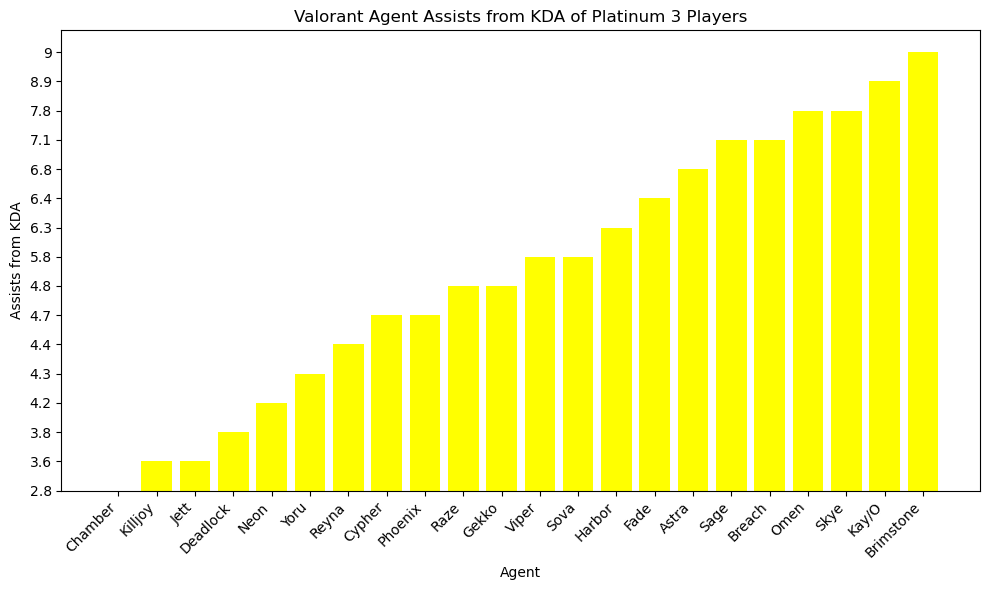

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_asc['agent'], data_assistskda_asc['assists_kda'], color = 'yellow')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA of Platinum 3 Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing the results in the "assists_by_kda" column, sorted from highest to lowest, provides insights into the agents that exhibit higher assist rates relative to their overall KDA:

**Brimstone**: Brimstone leads the list with the highest assists per KDA ratio. As a Controller, his ability to provide consistent utility and area control often results in assisting teammates in securing kills.

**Kay/O**: Kay/O continues to show strong team support with a high number of assists relative to his KDA, emphasizing his utility-focused gameplay.

**Skye**: Skye's supportive abilities, including healing and crowd control, contribute to her high assists per KDA ratio, showcasing her role as a versatile team-oriented agent.

**Omen**: Omen's assists indicate his contribution to the team's success through providing vision control and disrupting enemies with his utility.

**Breach**: Breach's assists highlight his role as an initiator and disruptor who helps his team capitalize on openings created by his abilities.

These statistics underscore the team-oriented nature of these agents, showcasing their ability to create opportunities and support their teammates in securing eliminations. While they might not always have the highest kill counts, their contributions are crucial in shaping the course of rounds and matches.

There is a common theme that I found among the agents with higher assists per KDA ratios:

**Supportive and Utility-Focused**: Many of these agents, including Brimstone, Skye, Sage, Astra, Fade, Viper, Sova, Gekko, and Cypher, are known for their supportive and utility-focused abilities. They provide healing, crowd control, area denial, and information gathering, which directly contribute to their higher assist rates.

### Win Percent Scores of the Valorant Agents

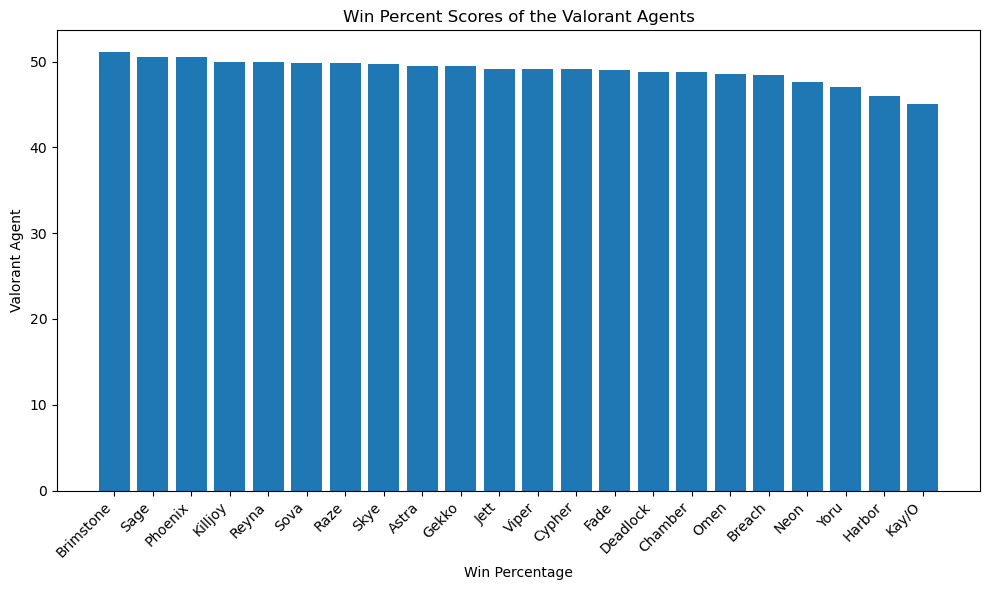

In [66]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'])
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percent Scores of the Valorant Agents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing the results in the "win_pcnt" column, sorted from highest to lowest, provides insights into the agents associated with higher win rates:

**Brimstone**: Brimstone leads the list with the highest win rate among the agents analyzed. His ability to provide consistent area control and utility likely contributes to his team's success in matches.

**Sage**: Sage follows closely with a high win rate. Her healing abilities, crowd control, and resurrect ability can greatly impact the outcome of rounds and matches.

**Phoenix**: Phoenix's strong win rate suggests his ability to self-sustain and contribute to team success through aggressive play and supportive fire abilities.

**Killjoy**: Killjoy's win rate is also relatively high. Her ability to lock down areas and gather information likely contributes to her team's control over the map.

**Reyna**, Sova, Raze, and Skye also have notable win rates. These agents' diverse abilities, including fragging potential and utility, could contribute to their teams' victories.

**Astra**, **Gekko**, **Viper**, **Cypher**, and **Fade** all maintain a solid win rate, suggesting their supportive and tactical contributions play a significant role in their team's success.

**Omen**, **Breach**, and **Kay/O** also exhibit reasonable win rates. Their utility, initiation capabilities, and disruption abilities contribute to the team's strategic advantage.

**Chamber**, **Neon**, and **Yoru** show slightly lower win rates among the agents analyzed.

**Jett** and **Harbor** exhibit lower win rates, potentially influenced by the aggressive and individualistic playstyles of some Jett players and the limited data for Harbor.

Overall, the agents with higher win rates are those who can either provide strong utility, control the battlefield, or secure eliminations consistently, ultimately leading to a higher chance of victory for their teams.

### Distribution of Agent Picks in Valorant

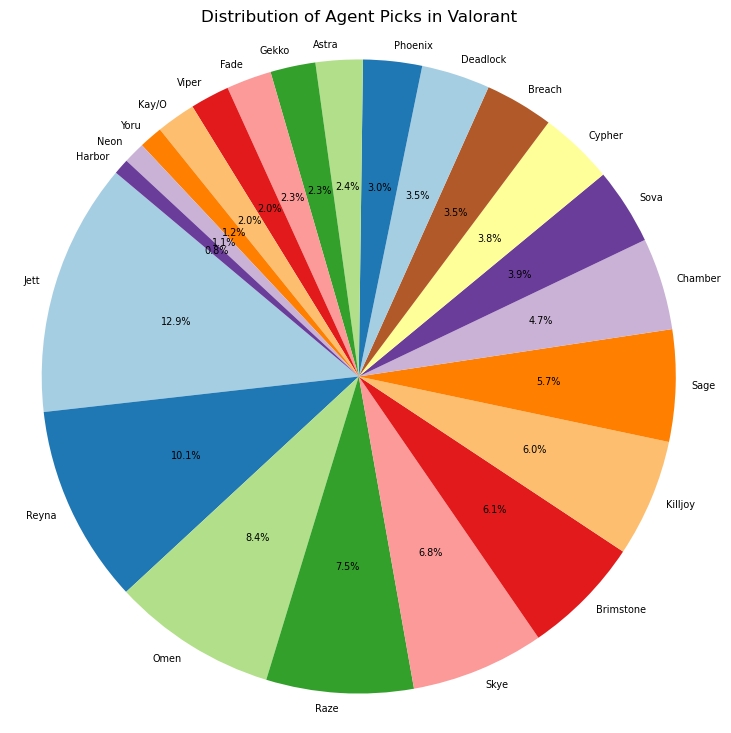

In [67]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], labels=data_pickpcnt_sorted['agent'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 7}, labeldistance=1.05)
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Agent Picks in Valorant")
plt.show()

#### FINDINGS:
Analyzing the agents based on their pick rates (pick_pcnt), we can identify patterns in terms of popularity among players. Here are some observations from the data:

**High Pick Rate, High Win Rate**: The agents with both high pick rates and high win rates are often considered strong and versatile picks that fit well into a variety of team compositions and strategies. These agents tend to have a balance between individual fragging potential and utility to support the team's objectives.
* **Jett and Reyna**: Both Jett and Reyna have relatively high pick rates and win rates. They are known for their aggressive playstyles, offering strong fragging potential, mobility, and self-sustainability.

**High Pick Rate, Varied Win Rate**: Some agents have high pick rates but exhibit varied win rates. This could be due to the fact that they are popular picks across different skill levels, resulting in different levels of effectiveness.
* **Omen**: Omen has a high pick rate but a varied win rate. His versatile abilities for map control and disruption make him a popular choice, but success with Omen often depends on player skill and coordination.
* **Raze, Skye, Killjoy, Sage, Sova, Cypher, Breach, Deadlock, Astra, Gekko, Fade, Viper, Kay/O**: These agents also have relatively high pick rates but their win rates vary. Factors such as playstyle, map knowledge, and individual skill can influence their effectiveness.

**Low Pick Rate, High Win Rate**: Some agents have low pick rates but maintain high win rates. This suggests that these agents might be highly effective in specific situations or require skilled players to use effectively.
* **Brimstone and Sage**: Both Brimstone and Sage have relatively low pick rates but higher win rates. They are known for their strong utility and supportive abilities that can greatly impact team strategies and success.

**Low Pick Rate, Varied Win Rate**: Similar to the agents with high pick rates, agents with low pick rates can also exhibit varied win rates. This might indicate that they are less popular and are typically chosen by players who are more experienced with their unique abilities.
* **Phoenix, Neon, Yoru**: These agents have low pick rates and their win rates vary. They might appeal to players who are comfortable with their playstyle and abilities.

**Specialized Picks**: Agents with relatively niche abilities or playstyles might have lower pick rates and win rates. Players who excel with these agents can achieve success, but they might not be as universally applicable.
* **Chamber and Harbor**: These agents have lower pick rates and specialized playstyles, contributing to lower win rates.

It's important to note that these observations are based on the available data and general trends. Player preferences, skill levels, the evolving meta, and balance changes can all influence the popularity and effectiveness of agents in Valorant.

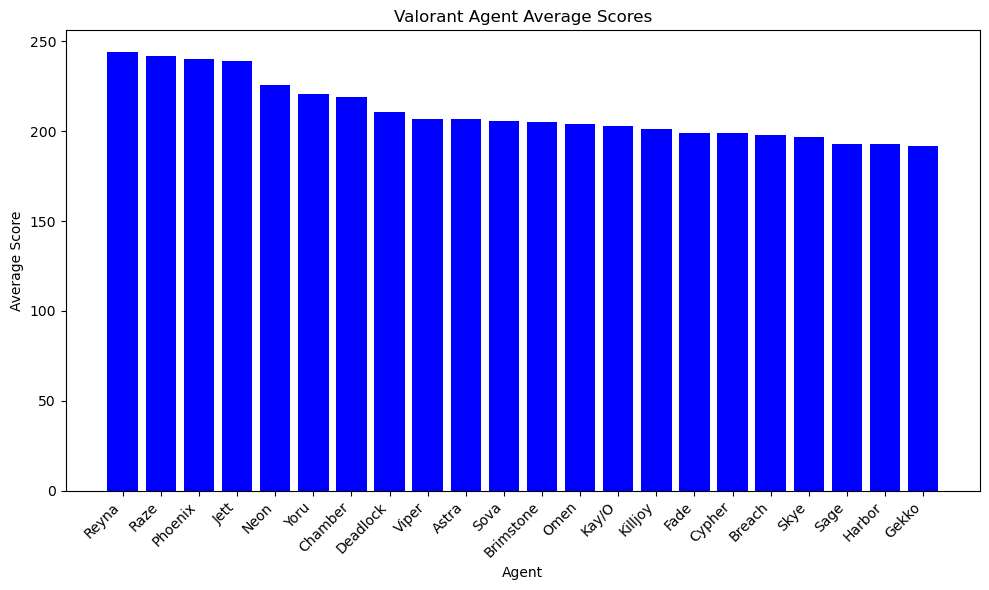

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='blue')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing the agents based on their average score (avg_score), which likely reflects their overall impact on the match, we can make the following observations:

**High Average Score, High Win Rate**: Agents with high average scores and high win rates are likely strong contributors to the team's success. They have a combination of strong fragging potential, utility, and game impact.
* **Reyna, Raze, Phoenix, Jett**: These agents have both high average scores and relatively high win rates. They are known for their aggressive playstyles, high fragging potential, and self-sustainability.

**High Average Score, Varied Win Rate**: Some agents with high average scores have varied win rates, indicating that they might be effective in skilled hands but not universally successful.
* **Neon, Yoru, Chamber, Deadlock, Viper, Astra, Sova, Omen, Kay/O, Killjoy, Fade, Cypher, Breach, Skye**: These agents have high average scores but their win rates vary. This suggests that they can make a significant impact when played well, but their effectiveness might be influenced by player skill, team coordination, and situational factors.

**High Average Score, Low Pick Rate**: Some agents with high average scores have low pick rates. This could indicate that they are favored by skilled players who are comfortable with their playstyle and abilities.
* **Neon, Yoru, Chamber, Deadlock**: These agents have high average scores but low pick rates, possibly due to their unique playstyles and abilities.

**High Average Score, High Pick Rate**: Agents with high average scores and high pick rates are likely popular choices that can contribute effectively to team success.
* **Jett, Reyna, Phoenix, Raze**: These agents have both high average scores and high pick rates, reflecting their popularity and impact on the game.

**Low Average Score, High Win Rate**: Some agents with lower average scores still maintain high win rates, suggesting that their utility and team support abilities contribute to their team's success.
* **Sage, Skye, Brimstone**: These agents have relatively lower average scores but maintain high win rates, indicating their supportive and strategic value.

**Low Average Score, Varied Win Rate**: Agents with low average scores and varied win rates might have specialized roles or require skillful execution.
* **Harbor, Gekko, Sage**: These agents have lower average scores and varied win rates, suggesting that they might have more specialized roles or require experienced players to be effective.

It's important to consider that these observations are based on trends within the data and may vary depending on individual player preferences, strategies, skill levels, and the evolving meta of the game.

## Agent Analysis Conclusion

In this analysis, we delved into the performance metrics of various agents in the popular tactical shooter game Valorant. By examining key metrics such as kill-to-death ratios (KD), kill-to-death-assist ratios (KDA), win percentages, pick percentages, average scores, and first blood percentages, we gained insights into the strengths, playstyles, and potential impact of different agents on match outcomes.

### Agent Profiles

We grouped agents based on common themes observed across the metrics:

**High Fragging Potential Agents (Top 5 KD/KDA)**: Agents like Reyna, Raze, Phoenix, and Jett exhibited high fragging potential, with impressive KD ratios and KDA ratios. These agents are known for their aggressive playstyles, self-sustainability, and high potential for securing kills.

**Balanced Performance Agents (Top 4 KDA, Deaths by KDA, Assists by KDA)**: Agents like Omen, Brimstone, Sage, and Viper demonstrated balanced performance across KDA ratios, deaths by KDA ratios, and assists by KDA ratios. They offer a mix of fragging potential, utility, and team support, contributing to their well-rounded gameplay.

**High Win Rate Agents (Top 4 Win Percentage)**: Brimstone, Sage, Phoenix, and Killjoy stood out with high win percentages. These agents might excel in team support, utility, and strategic play, leading to successful match outcomes.

**Popular Picks (Top 4 Pick Percentage)**: Jett, Reyna, Omen, and Raze garnered high pick percentages, indicating their popularity among players. Their diverse abilities and strong fragging potential make them appealing choices in the game.

**Impactful Agents (Top 4 Average Score)**: Reyna, Raze, Phoenix, and Jett exhibited both high average scores and high pick percentages, highlighting their capacity to make a significant impact on matches. These agents are favored by players who seek high-risk, high-reward playstyles.

**Strategic Agents (Top 4 Assists by KDA)**: Astra, Sage, Skye, and Brimstone demonstrated high assists by KDA ratios, suggesting their role as strategic and supportive agents. Their abilities facilitate team coordination and map control.

### Takeaways

Through this analysis, we gained a deeper understanding of the varied roles and strengths of different agents in Valorant. While some agents excel in fragging potential and individual skill, others shine in utility, team support, and strategic gameplay. The varying win rates and average scores suggest that the effectiveness of agents can be influenced by player skill, teamwork, and situational factors.

It's important to remember that individual player preferences, evolving game metas, and strategic choices can influence the success of different agents in different situations. This analysis provides a comprehensive overview, but experimentation and adaptation are key to optimizing agent choices based on team composition and personal playstyle.

As Valorant continues to evolve, staying up-to-date with new agent releases, balance changes, and gameplay strategies will be essential for making informed decisions and maximizing success in matches.

With all things considered, good luck and have a great time playing Valorant! ~ *Franchella*